In [1]:
import sdeint
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from itertools import accumulate
from scipy.optimize import curve_fit
from synthetic_env import synthetic_env
from naive_agents import DoNothing, FixedPhi
from scipy.stats import norm

In [2]:
def expected_prop(r,scaling,phi,lyapunov,r_d,kramer_d2):
    return scaling*(1/r)*np.power((r_d/r),(2*(phi-lyapunov)*kramer_d2))

def expected_prop_2(r,PHI,D,rd,scaling=1.0):
    return scaling*np.power((rd/r),(2*(PHI-D)/D))/r
    

def expo(x,a,b):
    return a*np.exp(b*x)

"""
Investigation into the stationary distribution given a fixed \bar{\lambda}_1 

WARN: may run forever if phi is too small and convergence never occurs
"""

#TODO PICK D AND 1/D

def stationary_distribution_2d(r_d, phi,D=0.1,num_eps=100):
    
    PHI = 0.2  # Define PHI value
    kappa = 0.001  # Define kappa value
    D = 0.1  # Define D value
    rd = np.sqrt(kappa/D)
    
    lambda_bar=D
    kramer_d2=1/D
    agent = FixedPhi(phi)
    env = synthetic_env(r_d, D=D,kappa=kappa)
    env.deltaT=0.005
    env.limit = 10000
    #env.kappa = r_d**2 * lambda_bar
    observed_distances = []
    collect_data = False
    start_collection = 0
    
    for i in range(0,num_eps):
        time_step=0
        #episode_rew=0
        while not env.isOver():
            action=agent.sample_action(env.getState())
            reward = env.step(action)
            time_step += 1
            
            # IF pass time mark say t=10 start collecting distribution statistics of the stationary distribution
            #print(env.dist())
            if env.time > 100:
                collect_data = True
                start_collection = env.time
            if collect_data:
                observed_distances.append(env.dist())
                #if (env.time - start_collection) > 20:
                #    break
            
        env.reset()
    #print(observed_distances)
    n,bins,_ = plt.hist(observed_distances, bins=500, density=True)
    
    #return
    
    index_max = max(range(len(n)), key=n.__getitem__)
    n=n[(index_max+1):]
    bins_to_fit = bins[(index_max+1):-1] # remove last edge so n and bins size match
    print(f"r_d approx = {bins[index_max]}")
    
    pars,cov = curve_fit(lambda r, scaling:expected_prop(r,scaling,phi,lambda_bar,r_d,kramer_d2) , xdata=bins_to_fit, ydata=n, p0=[1], bounds=(0, np.inf))

    pars_exp, cov_exp = curve_fit(expo, bins_to_fit,n)
    
    #plt.plot(bins_to_fit,expected_prop(bins_to_fit,pars[0],phi,lambda_bar,r_d,kramer_d2))
    plt.plot(bins_to_fit,expected_prop_2(bins_to_fit,phi,D,r_d))
    plt.plot(bins_to_fit,expo(bins_to_fit,*pars_exp))
    plt.xlabel("seperation")
    plt.ylabel("log density")
    plt.title(f"stationary distribution phi={phi}")
    
    labels=['Power Law From Paper', "Exponential"]
    plt.legend(labels)
    
    plt.yscale("log")
    ax = plt.gca()
    plt.axvline(x=r_d, color = 'orange')
    log_n=np.log(n)
    top = max(np.log(n))
    bot = min(log_n[np.where(log_n!=-np.inf)])
    label_loc = np.exp(sum(np.log(ax.get_ylim()))/2)
    
    bin_width = bins[1] - bins[0]
    plt.text(r_d + bin_width/2,label_loc,f"r_d = {r_d:.4f}",rotation=90, color = "orange")
    
    plt.ylim(bottom=10**(-7), top=10**2)
    plt.xlim(right=1.5)
    #ax.set_xlim([0, 0.5])
    #plt.axvline(x=bins[index_max], color = 'orange', label="blah")
    #log_n=np.log(n)
    #top = max(np.log(n))
    #bot = min(log_n[np.where(log_n!=-np.inf)])
    #label_loc = np.exp(sum(np.log(ax.get_ylim()))/2)
    #plt.text(bins[index_max+1],label_loc,f"r_d ~ {bins[index_max]:.4f}",rotation=90, color = "orange")
    
    
    
    return n,bins
    #plt.xscale("log")
    
    #plot maybe save data too somewhere for quick plotting later
    

In [3]:
#r_d = np.sqrt(0.001/0.1)
#stationary_distribution_2d(r_d, .2, num_eps=1)


In [4]:
PHI = 0.7 # Define PHI value
kappa = 0.02*np.pi  # Define kappa value
D = 0.25  # Define D value
r_d = np.sqrt(kappa/D)

lambda_bar=D
kramer_d2=1/D
agent = FixedPhi(PHI)
env = synthetic_env(r_d, D=D,kappa=kappa)
env.deltaT=0.005
env.limit = 10000
env.kappa = kappa
print(env.kappa)
#env.kappa = r_d**2 * lambda_bar
observed_distances = []
collect_data = False
start_collection = 0

for i in range(0,1):
    time_step=0
    #episode_rew=0
    while not env.isOver():
        action=agent.sample_action(env.getState())
        #print(f"Attempted phi is {np.linalg.norm(action)/np.linalg.norm(env.getState())}")
        reward = env.step(action)
        time_step += 1

        # IF pass time mark say t=10 start collecting distribution statistics of the stationary distribution
        #print(env.dist())
        if env.time > 100:
            collect_data = True
            start_collection = env.time
        if collect_data:
            observed_distances.append(env.dist())
            #if (env.time - start_collection) > 20:
            #    break

    env.reset()


0.06283185307179587


r_d approx = 0.2152592306753537


/tmp/ipykernel_8042/55218331.py:32: RuntimeWarning: divide by zero encountered in log
  log_n=np.log(n)
/tmp/ipykernel_8042/55218331.py:33: RuntimeWarning: divide by zero encountered in log
  top = max(np.log(n))


(-0.11435084854445225, 2.5)

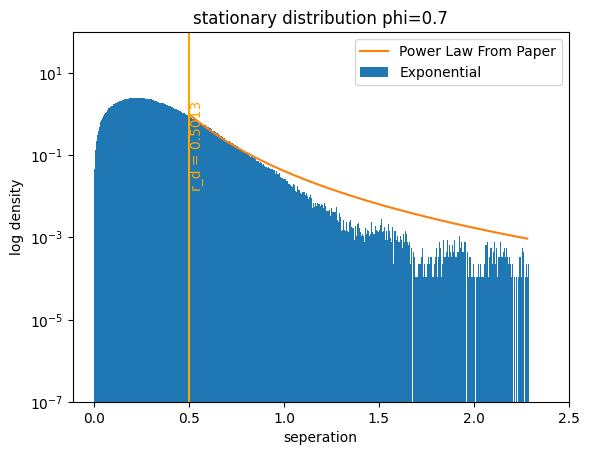

In [5]:
#print(observed_distances)
n,bins,_ = plt.hist(observed_distances, bins=500, density=True)

#return

index_max = max(range(len(n)), key=n.__getitem__)
n=n[(index_max+1):]
bins_to_fit = bins[(index_max+1):-1] # remove last edge so n and bins size match
print(f"r_d approx = {bins[index_max]}")

#pars,cov = curve_fit(lambda r, scaling:expected_prop(r,scaling,phi,lambda_bar,r_d,kramer_d2) , xdata=bins_to_fit, ydata=n, p0=[1], bounds=(0, np.inf))

pars_exp, cov_exp = curve_fit(expo, bins_to_fit,n)


x_range = np.arange(r_d,max(observed_distances[10000:]),0.01)
plt.plot(x_range,expected_prop_2(x_range,PHI,D,r_d,0.5))


#plt.plot(bins_to_fit,expected_prop_2(bins_to_fit,PHI,D,r_d)*0.5)
#plt.plot(bins_to_fit,expo(bins_to_fit,*pars_exp))
plt.xlabel("seperation")
plt.ylabel("log density")
plt.title(f"stationary distribution phi={PHI}")

labels=['Power Law From Paper', "Exponential"]
plt.legend(labels)

plt.yscale("log")
ax = plt.gca()
plt.axvline(x=r_d, color = 'orange')
log_n=np.log(n)
top = max(np.log(n))
bot = min(log_n[np.where(log_n!=-np.inf)])
label_loc = np.exp(sum(np.log(ax.get_ylim()))/2)

bin_width = bins[1] - bins[0]
plt.text(r_d + bin_width/2,label_loc,f"r_d = {r_d:.4f}",rotation=90, color = "orange")

plt.ylim(bottom=10**(-7), top=10**2)
plt.xlim(right=2.5)

In [6]:
assert(1==0)

AssertionError: 

In [ ]:
import sdeint
import numpy as np
import random as rand
import matplotlib.pyplot as plt

def control_2d(x, t, *args):
    "Deterministic part of the flow handles time correlation and control"

    dx= np.array([
        x[2]*x[0] + x[3]*x[1] - PHI*x[0],
        x[4]*x[0] + x[5]*x[1] - PHI*x[1],
        -x[2],
        -x[3],
        -x[4],
        -x[5]
    ])


    return dx

def stoch_flow_2d(x, t, *args):
    """
    The stochastic flows returns an array that is multiplied by the wiener proccesses
    Array is mostly diagonal?
    """
    #print(x)
    #kappa = args[0]
    #D = args[1]
    arr = np.zeros((6,5))
    arr[0,0] = arr[1,1] = np.sqrt(kappa)
    arr[2,2] = np.sqrt(D)
    arr[3,3] = np.sqrt(D)
    arr[3,4] = np.sqrt(2*D)
    arr[4,3] = np.sqrt(D)
    arr[4,4] = -np.sqrt(2*D)
    arr[5,2] = -np.sqrt(D)
    return arr


# used to curry args into sdeint
def closure(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc
"""

kappa = 0.01
D = 0.1
PHI=0.2
rd = np.sqrt(kappa/D)

tspan = np.arange(0.0, 50000.0,0.01)
trajectory = sdeint.itoint(closure(control_2d),
                                     closure(stoch_flow_2d),
                                     np.zeros(6),
                                     tspan,
                                    )
observed_distances = np.linalg.norm(trajectory[:,:2],axis=1)


n,bins,_ = plt.hist(observed_distances[10000:], bins=500, density=True)
"""

In [ ]:
kappa = 0.001
D = 0.01
PHI=0.02
rd = np.sqrt(kappa/D)

In [ ]:
def expected(r):
    return np.power((rd/r),(2*(PHI-D)/D))/r

In [ ]:
tspan = np.arange(0.0, 50000.0,0.05)
trajectory = sdeint.itoint(closure(control_2d),
                                     closure(stoch_flow_2d),
                                     np.zeros(6),
                                     tspan,
                                 0.02*np.pi   )
observed_distances = np.linalg.norm(trajectory[:,:2],axis=1)

In [ ]:
n,bins,_ = plt.hist(observed_distances[10000:], bins=500, density=True)
x_points = np.arange(rd,max(observed_distances[10000:]),0.05)
plt.plot(x_points,expected(x_points))
plt.yscale("log")
plt.ylim(bottom=10**(-4))

In [19]:

def expected(r):
    return np.power((rd/r),(2*(PHI-D)/D))/r


PHI = 0.7  # Define PHI value
kappa = 0.02*np.pi#0.001  # Define kappa value
D = 0.25  # Define D value
rd = np.sqrt(kappa/D)
def f(u, t):
    #print(u)
    return np.array([
        u[2]*u[0] + u[3]*u[1] - PHI * u[0],
        u[4]*u[0] + u[5]*u[1] - PHI * u[1],
        -u[2],
        -u[3],
        -u[4],
        -u[5]
    ])

def g(u, t):
    return np.array([
        [np.sqrt(kappa), 0, 0, 0, 0],
        [0, np.sqrt(kappa), 0, 0, 0],
        [0, 0, np.sqrt(D), 0, 0],
        [0, 0, 0, np.sqrt(D), np.sqrt(2) * np.sqrt(D)],
        [0, 0, 0, np.sqrt(D), -np.sqrt(2) * np.sqrt(D)],
        [0, 0, -np.sqrt(D), 0, 0]
    ])

u0 = np.zeros(6)
tspan = np.arange(0.0, 10000.0,0.005)  # 10000 steps

result = sdeint.itoint(f, g, u0, tspan)

separations = np.sum(result[:, :2]**2, axis=1)
separations = np.sqrt(separations)



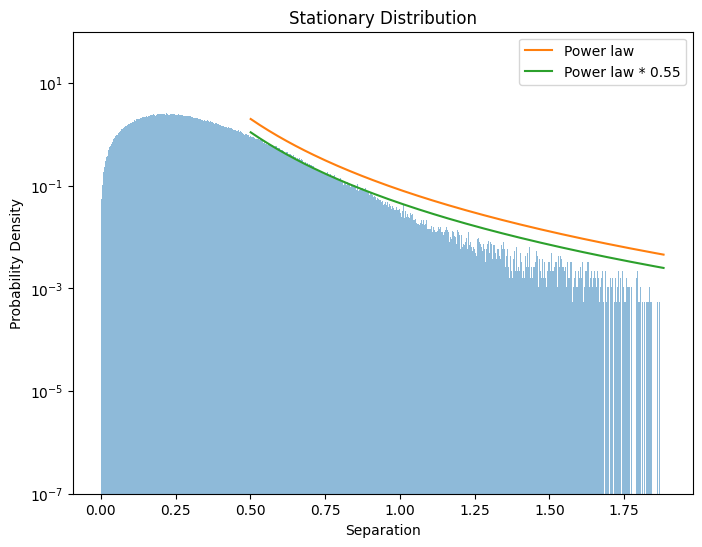

In [25]:
# Create a histogram
histogram_data = separations[10000:]
plt.figure(figsize=(8, 6))
plt.hist(histogram_data, bins=2000, density=True, alpha=0.5)

x_points = np.arange(rd,max(separations[10000:]),0.01)
plt.plot(x_points,expected(x_points))
plt.plot(x_points,expected(x_points)*0.55)
plt.yscale("log")
plt.ylim(bottom=10**(-7), top=10**2)
#plt.xlim(right=1.5)
labels=["Power law","Power law * 0.55"]
plt.legend(labels)
plt.title("Stationary Distribution")
plt.xlabel('Separation')
plt.ylabel('Probability Density')
plt.show()

In [15]:
kappa = 0.001
D = 0.1
PHI=0.2
rd = np.sqrt(kappa/D)

u0 = np.zeros(6)
tspan = np.arange(0.0, 10000.0,0.005)  # 10000 steps

result = sdeint.itoint(f, g, u0, tspan)

separations = np.sum(result[:, :2]**2, axis=1)
separations = np.sqrt(separations)

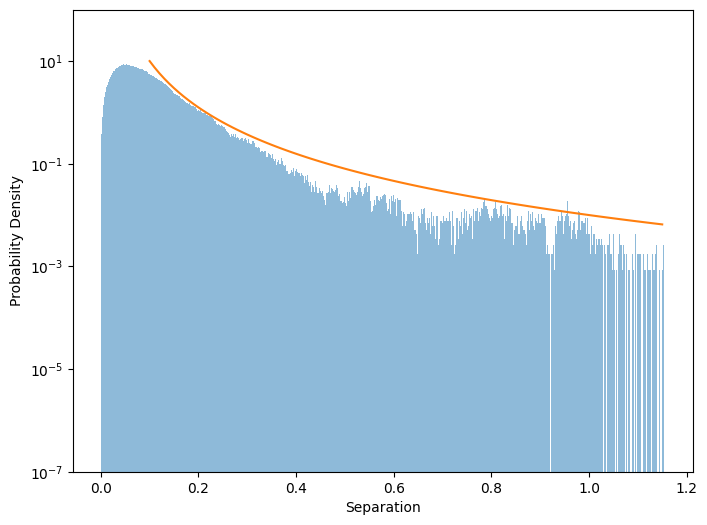

In [17]:
# Create a histogram
histogram_data = separations[1000:]
plt.figure(figsize=(8, 6))
plt.hist(histogram_data, bins=2000, density=True, alpha=0.5)

x_points = np.arange(rd,max(separations[1000:]),0.01)
plt.plot(x_points,expected(x_points))
plt.yscale("log")
plt.ylim(bottom=10**(-7), top=10**2)
#plt.xlim(right=1.5)

plt.xlabel('Separation')
plt.ylabel('Probability Density')
plt.show()

In [ ]:

def expected(r):
    return np.power((rd/r),(2*(PHI-D)/D))/r


PHI = 0.2  # Define PHI value
kappa = 0.001  # Define kappa value
D = 0.1  # Define D value
rd = np.sqrt(kappa/D)
def f(u, t):
    #print(u)
    return np.array([
        u[2]*u[0] + u[3]*u[1] - PHI * u[0],
        u[4]*u[0] + u[5]*u[1] - PHI * u[1],
        -u[2],
        -u[3],
        -u[4],
        -u[5]
    ])

def g(u, t):
    return np.array([
        [np.sqrt(kappa), 0, 0, 0, 0],
        [0, np.sqrt(kappa), 0, 0, 0],
        [0, 0, np.sqrt(D), 0, 0],
        [0, 0, 0, np.sqrt(D), np.sqrt(2) * np.sqrt(D)],
        [0, 0, 0, np.sqrt(D), -np.sqrt(2) * np.sqrt(D)],
        [0, 0, -np.sqrt(D), 0, 0]
    ])

u0 = np.zeros(6)
tspan = np.arange(0.0, 50000.0,0.1)  # 10000 steps

result = sdeint.itoint(f, g, u0, tspan)

separations = np.sum(result[:, :2]**2, axis=1)
separations = np.sqrt(separations)

# Create a histogram
histogram_data = separations[1000:]
plt.figure(figsize=(8, 6))
plt.hist(histogram_data, bins=2000, density=True, alpha=0.5)

x_points = np.arange(rd,max(separations[10000:]),0.05)
plt.plot(x_points,expected(x_points))
plt.yscale("log")
plt.ylim(bottom=10**(-4))

plt.xlabel('Separation')
plt.ylabel('Probability Density')
plt.show()



In [ ]:
np.linspace(0.0, 50000.0, 10000)

In [ ]:
def correlate_noise(dW,time_cor):
    return np.array(list(accumulate(dW, lambda x,y: x*time_cor*time_step + y)))

In [ ]:
"""
x will now be a 6-tuple

probably better to implement directly into the environment (environment must track the sigmas)

the arrays we return are all diagonal? not quite but they should result in the vectors given when multiplied 
"""

def control_2d(x, t, *args):
    "Deterministic part of the flow handles time correlation and control"
    control = args[0]
    tao = args[1]
    r_1 = x[0]
    r_2 = x[1]
    sigma_11 = x[2]
    sigma_12 = x[3]
    sigma_21 = x[4]
    sigma_22 = x[5]
    x[0] = sigma_11*r_1*sigma_12*r_2+control[0]
    x[1] = sigma_21*r_1*sigma_22*r_2+control[1]
    x[2:]=x[2:]*(-1/tao)
    return x

def stoch_flow_2d(x, t, *args):
    """
    The stochastic flows returns an array that is multiplied by the wiener proccesses
    Array is mostly diagonal?
    """
    kappa = args[0]
    D = args[1]
    arr = np.zeros((6,5))
    arr[0,0] = arr[1,1] = kappa
    arr[2,2] = np.sqrt(D)
    arr[3,3] = np.sqrt(D)
    arr[3,4] = np.sqrt(2*D)
    arr[4,3] = np.sqrt(D)
    arr[4,4] = -np.sqrt(2*D)
    arr[5,2] = -np.sqrt(D)
    return arr


def control(x, t, *args):
    """
    The deterministic control term
    """
    control = args[0]
    return -control
    #return -x


def stoch_flows(x, t, *args):
    """
    The stochastic flows
    """
    DIM = args[0]
    std_dev = args[1]
    cov_mat = args[2]
    brownian = np.pad(np.eye(DIM) * std_dev,((0,0),(0,DIM**2))) # Zero pad cols that correspond to the multiplicative noise
    mult_noise = np.tile(x,(DIM,DIM))
    mult_noise = mult_noise @ cov_mat
    mult_noise = np.pad(mult_noise,((0,0),(DIM,0))) # 12 wiener processes zero pad columns which correspond to the brownian motion processes
    
    return brownian + mult_noise

def closure(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc

def create_cov_mat(dim,D):
    cov_mat = np.zeros((dim**2,dim**2))
    for i in range(dim):
        for j in range(dim):
            for k in range(dim):
                for l in range(dim):
                    term1 = (j==l)*(i==k)
                    term2 = (i==j)*(k==l)
                    term3 = (j==k)*(i==l)
                    val = term1 - (term2+term3)/(dim+1)
                    index1 = dim*i + j
                    index2 = dim*k + l
                    cov_mat [index1,index2] = val
                    #print(f"i:{i+1},j:{j+1},k:{k+1},l:{l+1}")
                    #print(cov_mat)

    cov_mat = D*(dim+1)*cov_mat
    return cov_mat

In [ ]:
create_cov_mat(2,1)

In [ ]:
def plotLambda(t_end, sep_dist=0.2*np.pi, kappa=0.01, dim=2, D=2.,seperate=False, deltaT=0.01):
    type_plot = "together"
    if seperate:
        type_plot = "seperate"
    
    
    cov_mat = create_cov_mat(dim,D)
    
    t=np.arange(0,t_end,deltaT)
    num_episodes=100
    lam=[]
    for i in range(num_episodes):
        direction=np.random.rand(dim)- 0.5
        seperation=(direction/np.sqrt(direction@direction))*sep_dist
        
        
        
        
        dw = sdeint.deltaW(len(t)-1,dim**2+dim,deltaT)
        dw[:,dim:] = correlate_noise(dw[:,dim:],.5,deltaT) # time correlate multiplicative noise
        seperation = sdeint.itoSRI2(closure(control,seperation),#np.zeros(dim)),
                                     closure(stoch_flows,dim,np.sqrt(kappa),cov_mat),
                                     seperation,
                                     t,
                                    dW=dw
                                    )
        """
        # create your own dw matrix and pass it in to one of the sub functions
        seperation = sdeint.itoint(closure(control,np.zeros(dim)),
                                     closure(stoch_flows,dim,np.sqrt(kappa),cov_mat),
                                     seperation,
                                     t
                                    )
        """
        dist=np.linalg.norm(seperation,axis=1)
        #print(dist)
        start_d=dist[0]
        end_d=dist[-1]
        lam.append((np.log(end_d/start_d))/t_end)
    mu, sigma = norm.fit(lam)
    print(f"t={t_end} lyapunov_mu: {mu}, lyapunov_sigma: {sigma}")
    plt.hist(lam,bins=75,density=True)
    plt.title(f"Histogram with observation time={t_end} sample_size={num_episodes}")
    plt.xlabel("lambda")
    plt.ylabel("prob density")
    plt.savefig(f'lyapunov_dists/{t_end}LambdaDensity_{type_plot}.png')
    if seperate:
        plt.clf()

In [ ]:
def expo(x,a,b):
    return a*np.exp(b*x)


def plotSeperation(t_end, sep_dist=0.2*np.pi, kappa=0.01, dim=2, D=2.,seperate=False, deltaT=0.01):
    type_plot = "together"
    if seperate:
        type_plot = "seperate"
    
    
    cov_mat = create_cov_mat(dim,D)
    
    t=np.arange(0,t_end,deltaT)
    #num_episodes=100
    lam=[]
    direction=np.random.rand(dim)- 0.5
    seperation=(direction/np.sqrt(direction@direction))*sep_dist


    d_
    
    seperation = sdeint.itoint(closure(control,np.zeros(dim)),
                                 closure(stoch_flows,dim,np.sqrt(kappa),cov_mat),
                                 seperation,
                                 t,
                                   dW,
                                )

    dist=np.linalg.norm(seperation,axis=1)
    n,bins,_ = plt.hist(dist[1:]/t[1:],bins=50, density=True)
    return sum(dist)/len(dist)
    #pars_exp, cov_exp = curve_fit(expo, bins,n)

In [ ]:
lam = plotSeperation(100.,seperate=False, D=1.)

In [ ]:
print(lam)

In [ ]:
lam = plotSeperation(500.,seperate=False, D=1.)

In [ ]:
print(lam)

In [ ]:
plotLambda(5.,seperate=False, D=3.)

In [ ]:
def plotSep(t_end, sep_dist=0.2*np.pi, kappa=0.01, dim=2, D=0.2,seperate=False, deltaT=0.01):
    type_plot = "together"
    if seperate:
        type_plot = "seperate"
    
    
    cov_mat = create_cov_mat(dim,D)
    #cov_mat = np.zeros((dim**2,dim**2))
    
    t=np.arange(0,t_end,deltaT)
    num_episodes=1
    lam=[]
    #seperations = np.empty((0,dim))
    for i in range(num_episodes):
        direction=np.random.rand(dim)- 0.5
        seperation=(direction/np.sqrt(direction@direction))*sep_dist
        
        dw = sdeint.deltaW(len(t)-1,dim**2+dim)
        dw[:,dim:] = correlate_noise(dw[:,dim:],.5) # time correlate multiplicative noise
        seperation = sdeint.itoSRI2(closure(control,seperation),#np.zeros(dim)),
                                     closure(stoch_flows,dim,np.sqrt(kappa),cov_mat),
                                     seperation,
                                     t,
                                    dW=dw
                                    )
        """
        seperation = sdeint.itoint(closure(control,seperation),#np.zeros(dim)),
                                     closure(stoch_flows,dim,np.sqrt(kappa),cov_mat),
                                     seperation,
                                     t
                                    )
        """
        #seperations = np.vstack(seperations,seperation)
        #lam.append((np.log(end_d/start_d))/t_end)
    
    plt.plot(seperation[:,0],seperation[:,1])
    return seperation

In [ ]:
plotSep(5.)

In [ ]:
stationary_distribution(0.02*np.pi, 0.75, num_eps=10)

In [ ]:
stationary_distribution(0.02*np.pi, 1.)

In [ ]:
stationary_distribution(0.02*np.pi, 1.25)

In [ ]:
stationary_distribution(0.02*np.pi, 2.)

In [ ]:
assert(1==0)

In [ ]:
for i in range(10):
    plotLambda(5.,seperate=False, D=i/10)

In [ ]:
for i in range(10,20):
    plotLambda(5.,seperate=False, D=i/10)

In [ ]:
np.random.rand(3)-0.5

In [ ]:
np.arange(0,10,0.1)

In [ ]:
for i in range(5,6):
    print(i)

In [ ]:
test=sdeint.deltaW(1000,1,0.01)
plt.hist(test)

In [ ]:
plt.hist(np.cumsum(test)/10)

In [ ]:
x=sdeint.deltaW(10,5,0.01)
np.cumsum(x,axis=0)

In [ ]:
x

In [ ]:
test=sdeint.deltaW(1,12,0.001)

In [ ]:
prev=np.ones(12)

In [ ]:
prev

In [ ]:
test[:,3:] = prev[3:] + test[:,3:]

In [ ]:
test.shape

In [ ]:
np.arange(6)[0:2]

In [ ]:
np.diag([1,2,3])[1,1]

In [ ]:
np.zeros((3,3))